# Visualization functions

In [5]:
from src.genetic import *
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [6]:
def load_data(path: str):
    with open("data/genetic-05-06-19-21-36-16.pkl", "rb") as f:
        data = pickle.load(f)
    # check if datasets didnt have repetitions 
    sample_reps = np.zeros_like(data[0].train_probs)
    counter = 0
    bad = np.zeros(len(data))
    for i, gen in enumerate(data):
        for dataset in gen.model_samples:
            sample_reps = np.zeros_like(data[0].train_probs)
            sample_reps[dataset.astype(int)] = 1
            if sample_reps.sum() != 1500:
                bad[i] += 1
    if bad.sum() > 0:
        print("There are repetitions in datasets!")
        print("Number of bad datasets per generation:", bad)
    else:
        print("There aren't any repetitions.")
    return data

## Visualize probabilities

In [7]:
def get_min_max(data):
    all_train_probs = np.asarray([gen.train_probs for gen in data])
    non_zero_train_probs = all_train_probs[all_train_probs > 0]
    return (non_zero_train_probs.min(), non_zero_train_probs.max())

def show_sample_prob_hist(data, epoch, ):
    plt.figure(figsize=(12,8))
    hist_range = get_min_max(data)
    n, bin_edges, patches = plt.hist(
        data[epoch].train_probs[data[epoch].train_probs > 0],
        bins=100,
        log=True,
        range=hist_range
    )
    print("Non zero probabilites",len(data[epoch].train_probs[data[epoch].train_probs > 0]))
    print("(Max, Min) =", hist_range)
    plt.xlabel("Probability")
    plt.ylabel("Bin size")
    plt.show()
    return n

def show_variance_of_sample_prob_hists(data, bins=100):
    '''W celu większej jasności wizualizowanych danych przesunąłem
    średnią wszystkich rozkładów do 1, poprzez podzielenie
    całego zbioru przez średnią. 
    '''
    plt.figure(figsize=(12,8))
    hists = np.zeros((len(data), bins))
    # calculate min and max of whole dataset
    hist_range = get_min_max(data)
    bar_width = (hist_range[1] - hist_range[0]) * 0.8 / bins

    for i, gen in enumerate(data):
        hists[i], bin_edges = np.histogram(gen.train_probs[gen.train_probs > 0], bins=bins, range=hist_range)
    _ = plt.bar(bin_edges[:-1], (hists / hists.mean(axis=0)).var(axis=0), align = 'edge', width=bar_width)
    plt.ylabel("Variance")
    plt.xlabel("Probability bins")
    plt.show()
    
def analyse_non_zero_probs(data):
    non_zero_probs = [(gen.train_probs > 0).sum() for gen in data]
    print("Mean number of non zero probabilities:", np.asarray(non_zero_probs).mean())
    
    plt.figure(figsize=(12,8))
    plt.plot(range(len(data)), non_zero_probs)
    plt.xlabel("Generations")
    plt.ylabel("Number of non zero probabilities")
    plt.show()

## Visualize scores

In [8]:
def show_scores(data):
    plt.figure(figsize=(12,8))
    maximum = [gen.model_scores.max() for gen in data]
    mean = [gen.model_scores.mean() for gen in data]

    plt.plot(range(len(data)), maximum, mean)
    plt.xlabel("Generation")
    plt.ylabel("R2 score on validation")
    plt.legend(["Best score", "Mean score"])
    plt.show()

## Visualize frequency of samples in datasets

In [9]:
def get_sample_freq(data):
    '''Calculate frequency of each sample'''
    sample_freq = np.zeros_like(data[0].train_probs)
    for gen in data:
        for dataset in gen.model_samples:
            sample_freq[dataset.astype(int)] += 1
    return sample_freq

def show_sample_freq_hist(data):
    sample_freq = get_sample_freq(data)
    plt.figure(figsize=(12,8))
    plt.hist(sample_freq, bins = 1000, log=True)
    plt.ylabel("Bin size")
    plt.xlabel("Number of occurences")
    plt.show()

In [10]:
def get_n_most_common(data, n=1500):
    sample_freq = get_sample_freq(data)
    most_common_indices = np.argsort(sample_freq)[-n:]
    return most_common_indices

def show_n_most_common_history(data, n=1500):
    most_common_indices = get_n_most_common(data, n=n)
    
    masks = np.zeros((len(data), len(data[0].train_probs)))
    for i, gen in enumerate(data):
        for dataset in gen.model_samples:
            masks[i][dataset.astype(int)] += 1
    
    most_common_masks = masks[:, np.flip(most_common_indices)]
    plt.figure(figsize=(12,n//25))
    plt.imshow(most_common_masks.transpose(), cmap='gray')
    plt.xlabel("Generations")
    plt.ylabel("Samples sorted from most common to less")
    plt.colorbar()
    plt.show()

# Results visualization

In [11]:
var = load_data('data/genetic-05-06-19-21-36-16.pkl')
loss = load_data('data/genetic-05-06-19-21-28-55.pkl')

There aren't any repetitions.
There aren't any repetitions.


Mean number of non zero probabilities: 50003.2578125


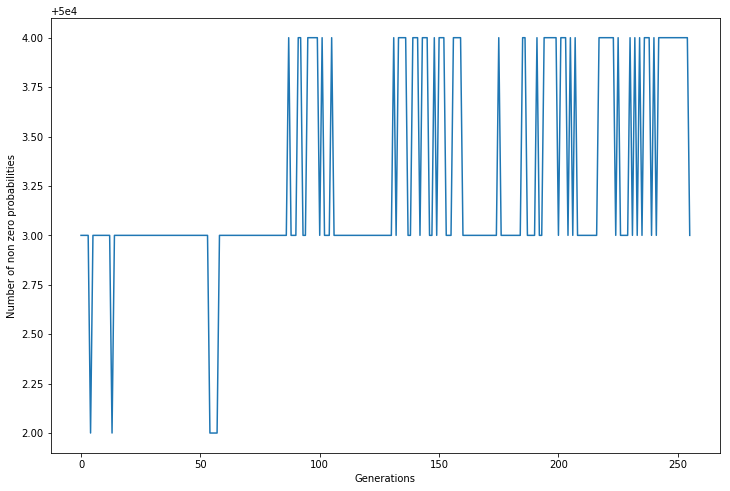

In [12]:
analyse_non_zero_probs(var)

Mean number of non zero probabilities: 50003.2578125


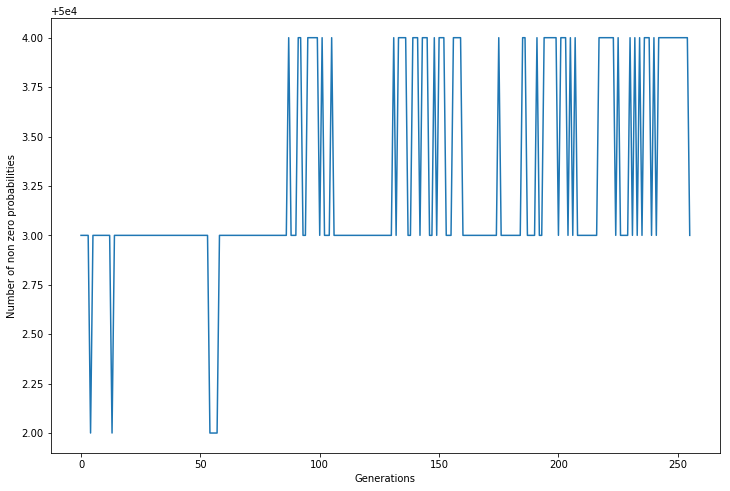

In [13]:
analyse_non_zero_probs(loss)

loss
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


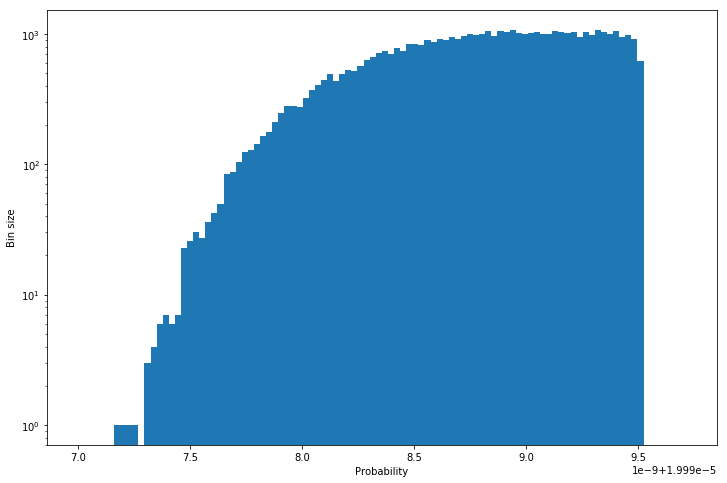

var
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


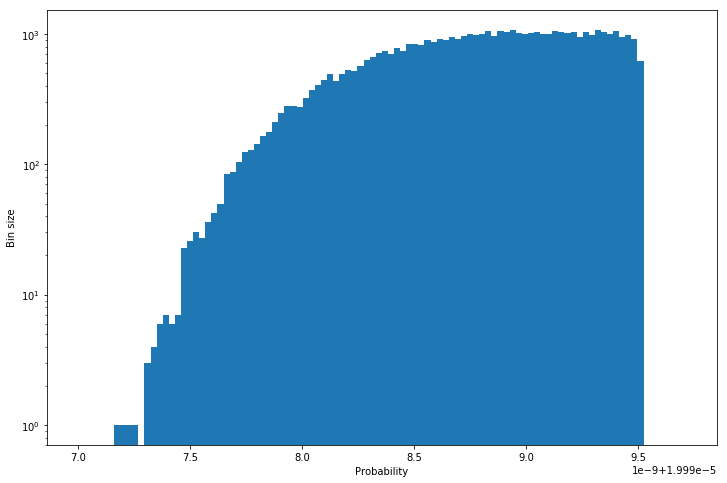

loss
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


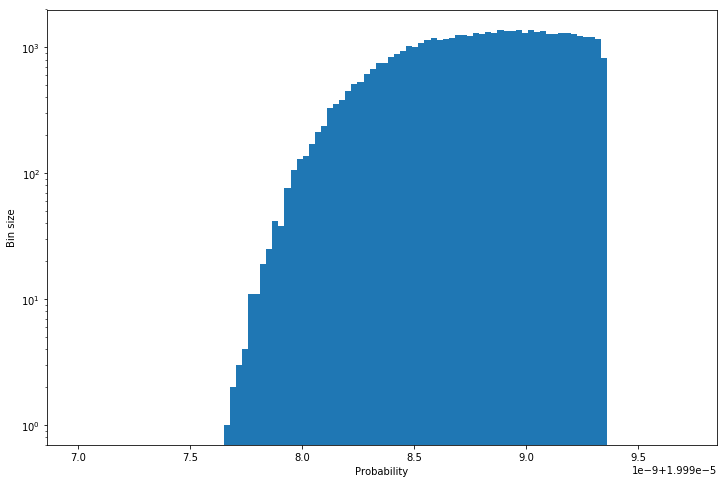

var
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


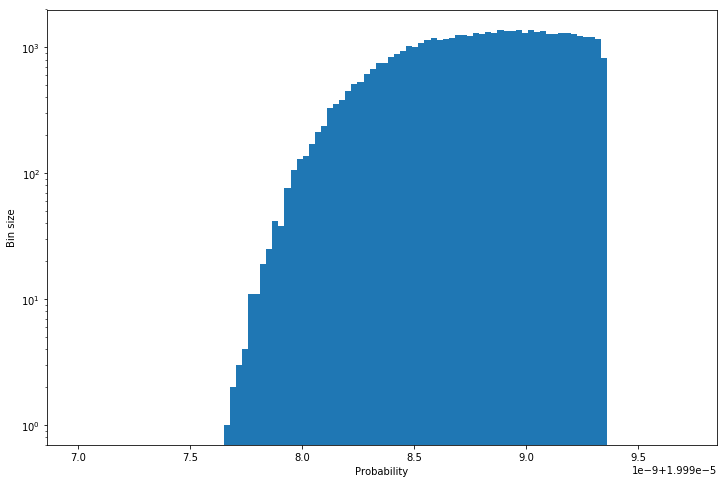

loss
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


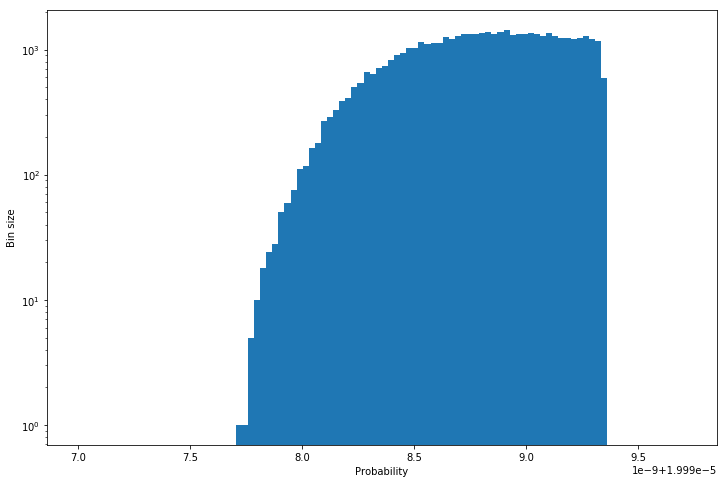

var
Non zero probabilites 50003
(Max, Min) = (1.9996997020141668e-05, 1.999971420107911e-05)


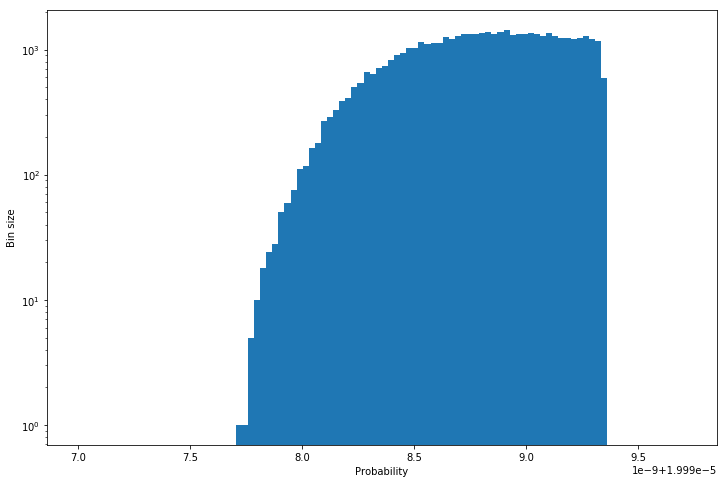

In [15]:
for e in [1, 5, 10]:
    print('loss')
    show_sample_prob_hist(loss, epoch=e)
    print('var')
    show_sample_prob_hist(var, epoch=e)

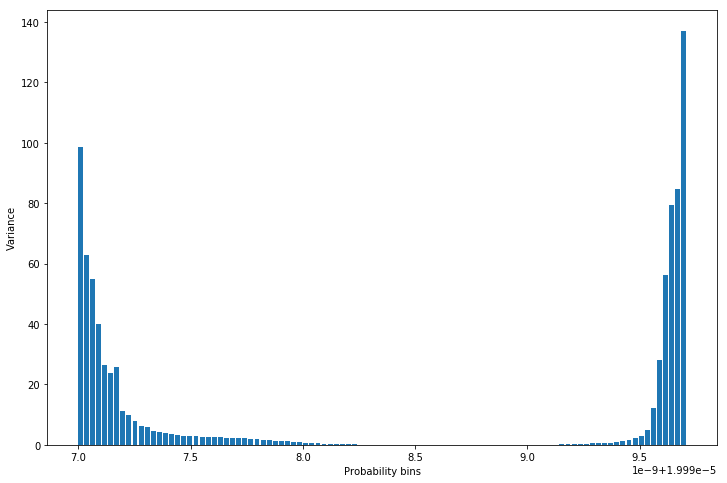

In [16]:
# This plot shows the variance of histograms of samples probabilities in generations
show_variance_of_sample_prob_hists(loss)

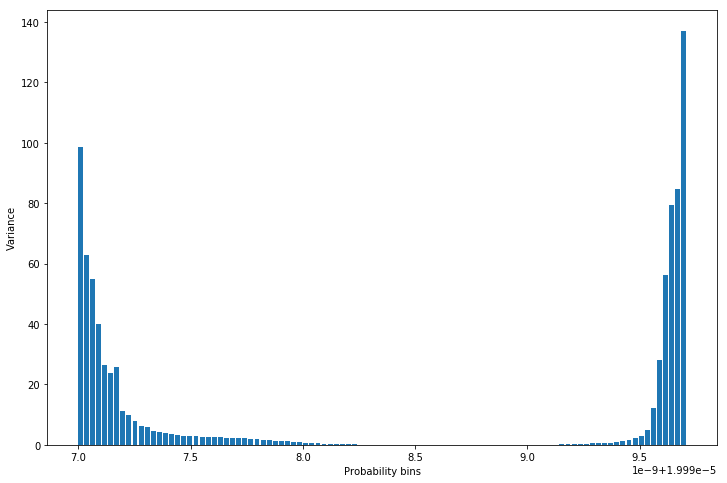

In [17]:
# This plot shows the variance of histograms of samples probabilities in generations
show_variance_of_sample_prob_hists(var)

## Scores

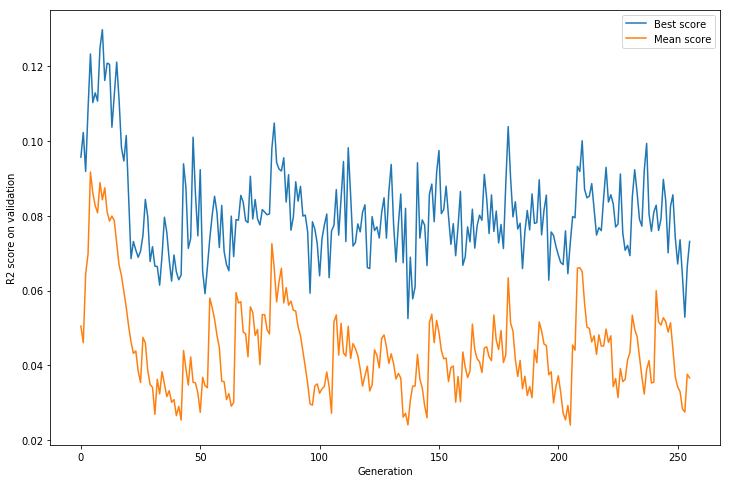

In [18]:
show_scores(loss)

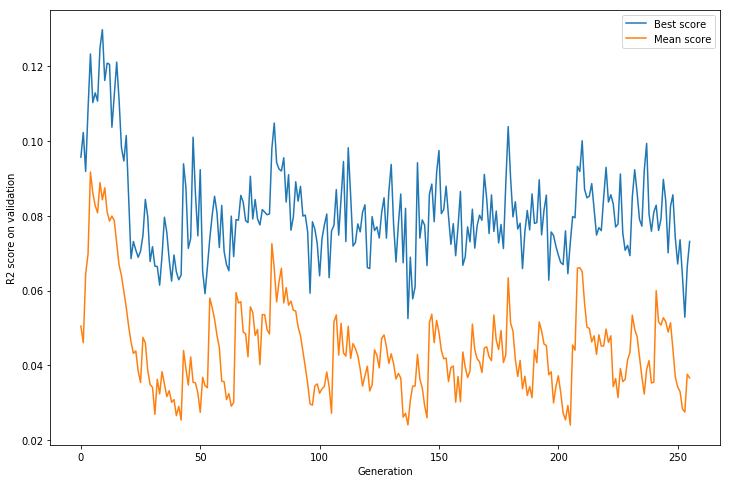

In [20]:
show_scores(var)

## Sample frequency

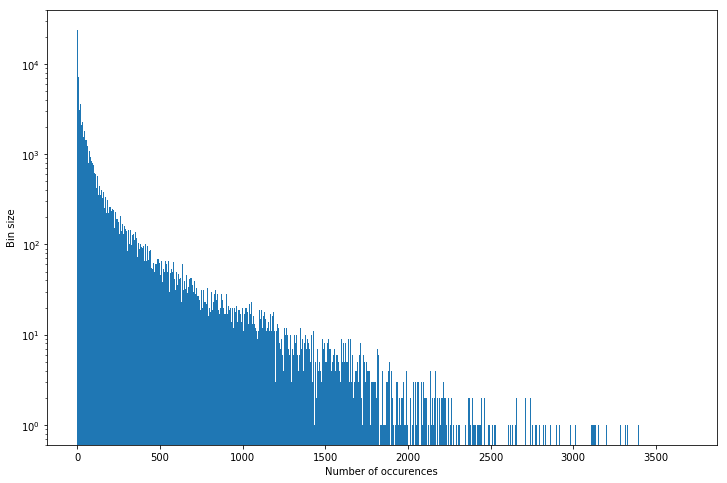

In [21]:
show_sample_freq_hist(data)

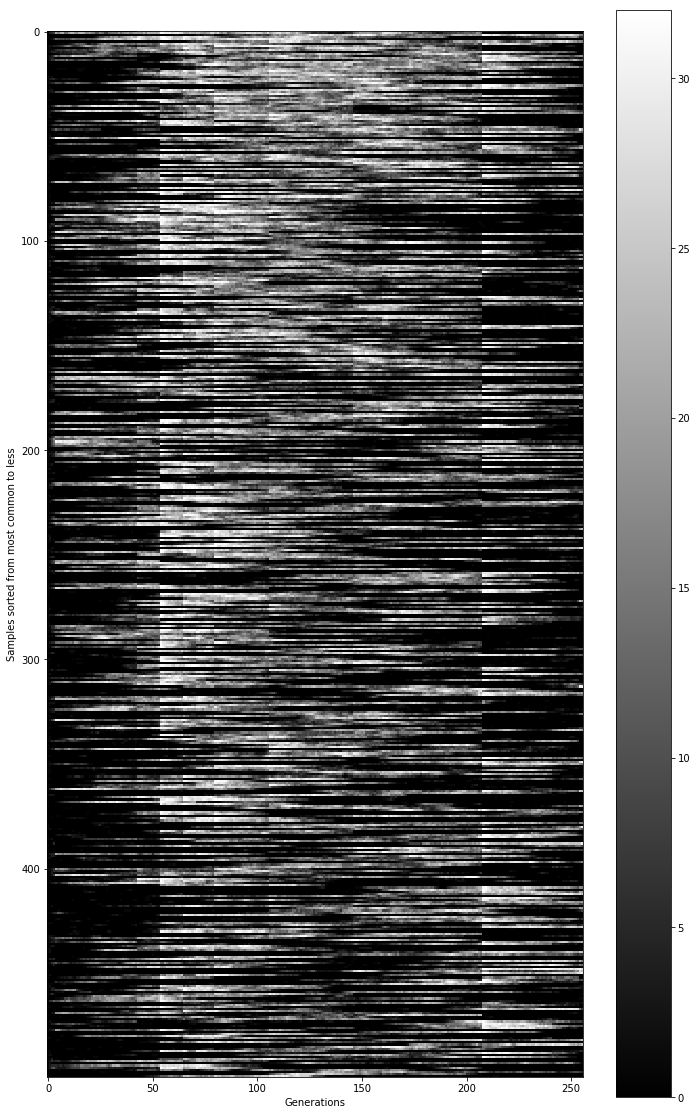

In [22]:
show_n_most_common_history(data, n=500)